In [1]:
from google.colab import files
upload =files.upload()

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    LabelEncoder
)
from sklearn.model_selection import train_test_split


In [3]:
df=pd.read_csv('StudentsPerformance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df=pd.get_dummies(df,columns=["parental level of education"],drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   gender                                         1000 non-null   object
 1   race/ethnicity                                 1000 non-null   object
 2   lunch                                          1000 non-null   object
 3   test preparation course                        1000 non-null   object
 4   math score                                     1000 non-null   int64 
 5   reading score                                  1000 non-null   int64 
 6   writing score                                  1000 non-null   int64 
 7   parental level of education_bachelor's degree  1000 non-null   bool  
 8   parental level of education_high school        1000 non-null   bool  
 9   parental level of education_master's degree    1000 non-null   b

In [5]:
df['gender']=df['gender'].map({'female':0,'male':1})
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,group B,standard,none,72,72,74,True,False,False,False,False
1,0,group C,standard,completed,69,90,88,False,False,False,True,False
2,0,group B,standard,none,90,95,93,False,False,True,False,False
3,1,group A,free/reduced,none,47,57,44,False,False,False,False,False
4,1,group C,standard,none,76,78,75,False,False,False,True,False


In [6]:
le=LabelEncoder()
df['race/ethnicity']=le.fit_transform(df['race/ethnicity'])


In [7]:
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,standard,none,72,72,74,True,False,False,False,False
1,0,2,standard,completed,69,90,88,False,False,False,True,False
2,0,1,standard,none,90,95,93,False,False,True,False,False
3,1,0,free/reduced,none,47,57,44,False,False,False,False,False
4,1,2,standard,none,76,78,75,False,False,False,True,False


In [8]:
df['lunch']=df['lunch'].map({'free/reduced':0,'standard':1})
df['test preparation course']=df['test preparation course'].map({'none':0,'completed':1})
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,0,72,72,74,True,False,False,False,False
1,0,2,1,1,69,90,88,False,False,False,True,False
2,0,1,1,0,90,95,93,False,False,True,False,False
3,1,0,0,0,47,57,44,False,False,False,False,False
4,1,2,1,0,76,78,75,False,False,False,True,False


In [9]:
df['percentage']=df[['math score','reading score','writing score']].mean(axis=1)
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,percentage
0,0,1,1,0,72,72,74,True,False,False,False,False,72.666667
1,0,2,1,1,69,90,88,False,False,False,True,False,82.333333
2,0,1,1,0,90,95,93,False,False,True,False,False,92.666667
3,1,0,0,0,47,57,44,False,False,False,False,False,49.333333
4,1,2,1,0,76,78,75,False,False,False,True,False,76.333333


In [10]:
df['pass/fail']=df['percentage'].apply(lambda x:1 if x>=55 else 0)
df.head()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,percentage,pass/fail
0,0,1,1,0,72,72,74,True,False,False,False,False,72.666667,1
1,0,2,1,1,69,90,88,False,False,False,True,False,82.333333,1
2,0,1,1,0,90,95,93,False,False,True,False,False,92.666667,1
3,1,0,0,0,47,57,44,False,False,False,False,False,49.333333,0
4,1,2,1,0,76,78,75,False,False,False,True,False,76.333333,1


<ipython-input-11-16cad490bbc7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='pass/fail', data=df,palette='Set1')


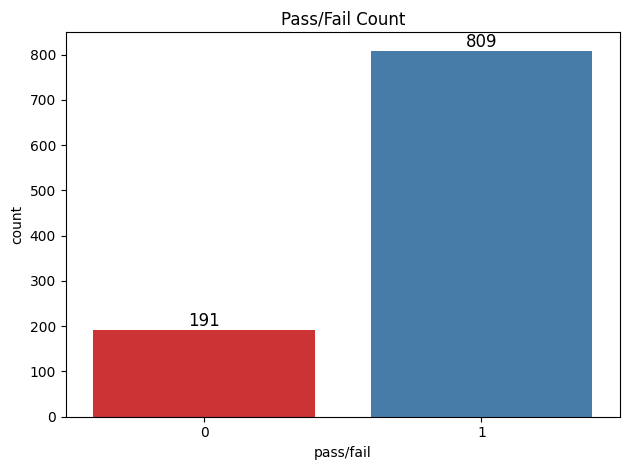

In [11]:
ax=sns.countplot(x='pass/fail', data=df,palette='Set1')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)
plt.title('Pass/Fail Count')
plt.xlabel('pass/fail')
plt.ylabel('count')
plt.tight_layout()
plt.show()

In [12]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
x = df[['math score', 'reading score', 'writing score']].values
y = df['pass/fail'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Confusion Matrix:
 [[ 45   0]
 [  0 155]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00       155

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [13]:
self_test=[[54,55,57]]
yeha=model.predict(self_test)[0]
print(yeha)

1


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)
rf_y_pred=rf_model.predict(x_test)
print(accuracy_score(y_test,rf_y_pred))
print(confusion_matrix(y_test,rf_y_pred))
print(classification_report(y_test,rf_y_pred))

0.995
[[ 45   0]
 [  1 154]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       1.00      0.99      1.00       155

    accuracy                           0.99       200
   macro avg       0.99      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200



In [17]:
sample = [[22, 65, 30]]
pred = rf_model.predict(sample)[0]
print(" Prediction:", "Pass " if pred == 1 else "Fail ")


 Prediction: Fail 
